# **Mestrado em Informática**
# **Pós-Graduação em Data Science and Digital Transformation**

## *(Ambientes de) Programação para Ciência de Dados*

**Mónica Vieira Martins**  
----

># Lidar com valores ausentes  e com variáveis categóricas. 



# Introdução: pré-processamento dos dados

Este tutorial foca-se nalguns passos fundamentais de  pré-processamento de dados, nomeadamente em como lidar com eventuais valores ausentes e como transformar os valores das variáveis categóricas em valores numéricos.


# Dados

Neste tutorial vamos utilizar um conjunto de dados referente aos passageiros do [Titanic](https://www.kaggle.com/c/titanic/data). Trata-se de um conjunto de dados disponibilizado pela plataforma [Kaggle](https://www.kaggle.com) que inclui informação vária sobre os passageiros do Titanic, e que indica se foram ou não sobreviventes do naufrágio.

O objetivo é usar um modelo de regressão logística para prever se um dado passageiro sobrevive ou não ao naufrágio.




O ficheiro de dados denomina-se `Titanic.csv`. A descrição das colunas do ficheiro é a seguinte:

>Variável | Significado | Valores
>---------|-------------|---------
>Survival | sobrevivência | 0=Não, 1=Sim  |
>Pclass | classe do bilhete | 1=1ª, 2=2ª, 3=3ª|
> Name | nome | |
>Sex | sexo | male, female |
>Age | idade, em anos | |
>Sibsp | número de irmãos/esposos a bordo||
>Parch | número de pais/filhos a bordo |
>Ticket |	número do bilhete |
>Fare | preço pago  |
> Embarked | porto de embarcação | C=Cherbourg, Q=Queenstown, S=Southampton




In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np


In [3]:
#adequar o path do ficheiro
path = "titanic.csv"
dados = pd.read_csv(path)

À medida que analisamos os dados, vamos verificando se os requisitos enunciado em cima são cumpridos.

In [4]:
dados.shape

(891, 12)

Vemos que o conjunto de dados possui 891 entradas e 12 atributos.  
Mesmo que usássemos os 12 atributos, o número de entradas seria suficiente para garantir que o conjunto de dados é suficientemente volumoso para aplicação da regressão logística.

In [5]:
dados.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*PassengerID* e índice são redundantes, podemos alterar o índice com `set_index()`

In [7]:
dados.set_index('PassengerId', inplace=True, drop=True)
dados.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Análise prévia aos dados

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Vemos que para a maior parte dos atributos existem 891 entradas, mas para a idade (`Age`), cabine (`Cabin`) e porto de embarque  (`Embarked`) o número é menor, o que significa que existem **valores nulos ou omisso**. Teremos portanto que decidir como lidar com estes atributos.

Também verificamos que algumas dos atributos (`Name`, `Sex`, `Ticket`, `Cabin` e `Embarked` ) não estão expressas em valores numéricos. Tratam-se de **variáveis categóricas**. Veremos mais à frente como lidar com este tipo de variáveis.   

Vamos utilizar como variável independente, ou **alvo**, a variável `Survived`. Vejamos os valores possíveis dessa variável :

In [9]:
dados.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Trata-se de uma variável binária, adequada, portanto, à utilização como alvo num modelo de regressão logística binário.  



A percentagem de passageiros que se salvaram foi pequena:

In [10]:
#Pencentagem de sobreviventes:
survived  = dados.Survived[dados.Survived==1].count() / dados.Survived.count()*100
print("Percentagem de sobreviventes: %.0f%%"%(survived))

Percentagem de sobreviventes: 38%


In [11]:
#Carateristicas dos atributos numéricos
dados.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mais à frente faremos uma análise mais cuidada ao relacionamento entre as variáveis independentes e o alvo. Podemos conteudo ter uma noção abrangente observando o resultado do *pairplot* (variáveis numéricas), aqui obtido usando `sns.pairplot` e com cores diferentes para a distribuição de cada uma das classes:

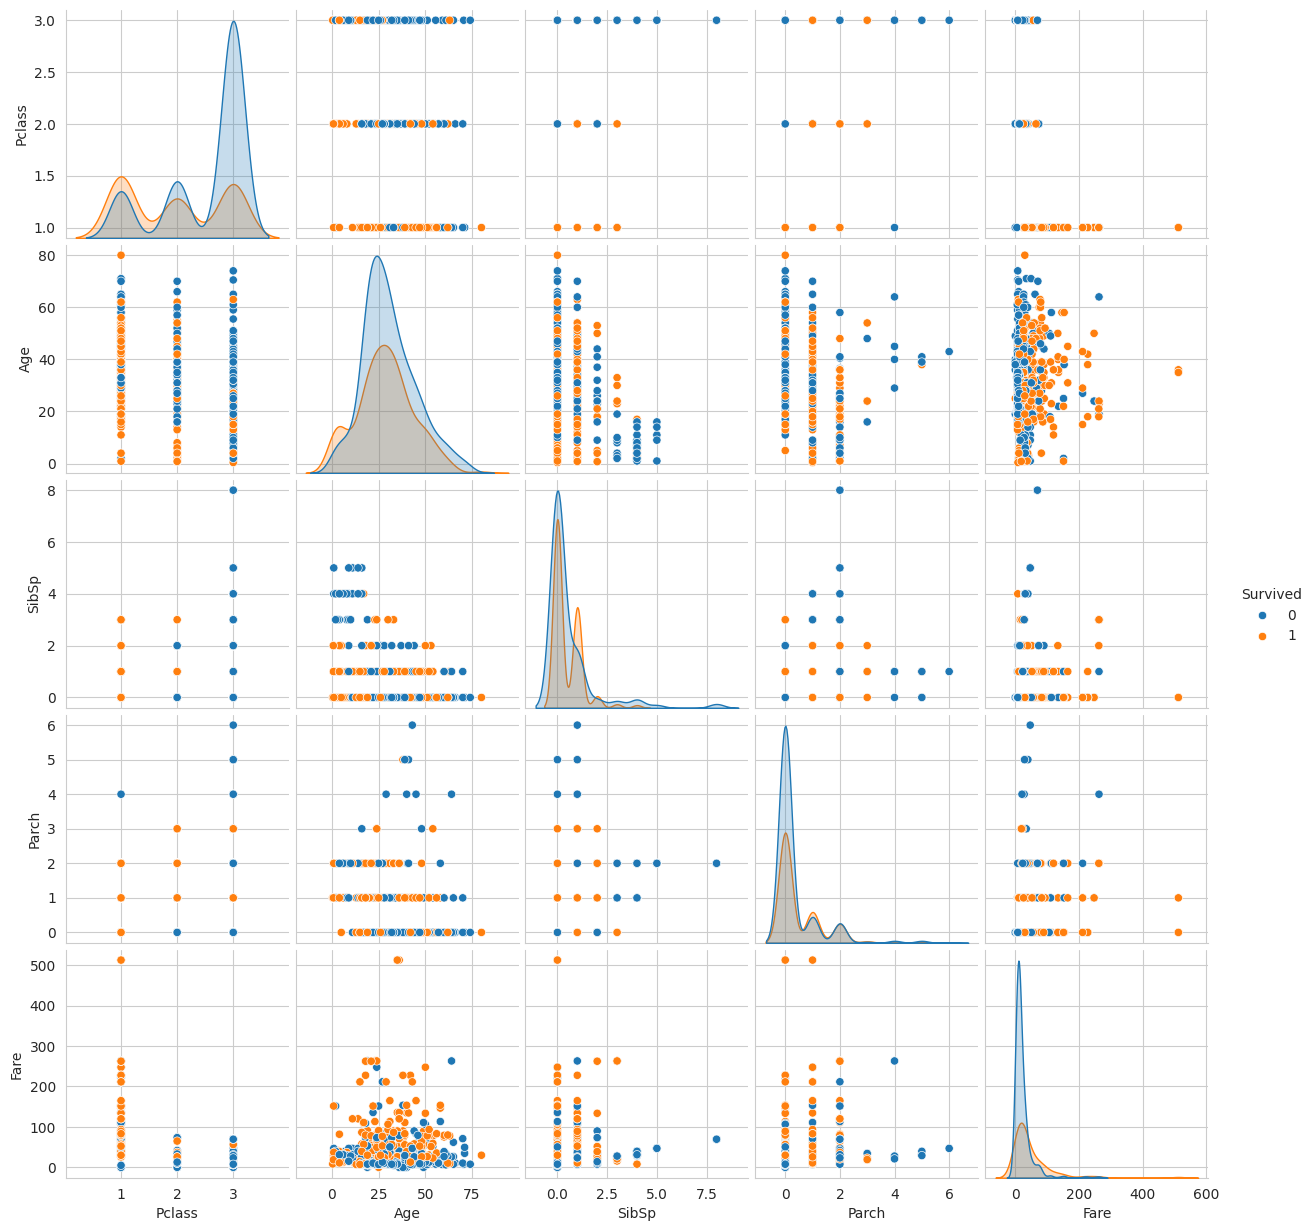

In [12]:
sns.pairplot(dados, hue="Survived")

O *pairplot*  permite algumas interpretações que exploramos melhor mais à frente, nomeadamente relativos à classe, idade, sexo.

Verifiquemos, agora, a correlação entre as variáveis numéricas:


<Axes: >

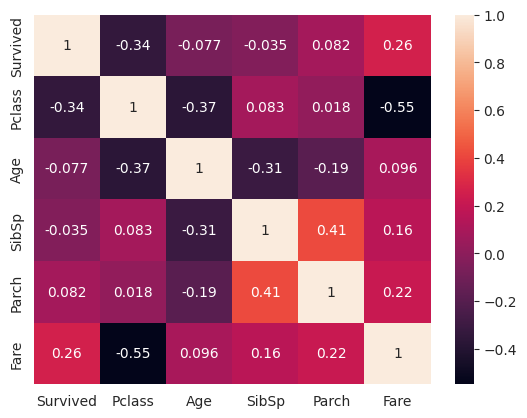

In [13]:
#selecinoar  os atributos numéricos
dados_num = dados.select_dtypes(include='number')
#correlação entre os atributos numéricos e visualização em heatmap
sns.heatmap(dados_num.corr(), annot=True)

Uma vez que os valores de correlação são baixos em termos absolutos (exceto a auto-correlação, na diagonal principal, que é sempre 1),  **as variáveis numéricas não estão correlacionadas entre si**, sendo portanto adequadas para serem usadas como variáveis independentes na criação de um modelo de regressão logística.  
Também se observa que nenhuma das variáveis numéricas tem um elevado coeficiente de correlação com o alvo, o que só por si pode indicar que a tarefa de classificação não é óbvia.


Tentemos então adquirir alguma intuição sobre que  atributos podem ser relevantes para treinar o modelo de regressão logística.  
Vejamos, graficamente, como cada um dos atributos numéricos se relaciona com as duas classes do alvo

<Axes: xlabel='Survived', ylabel='count'>

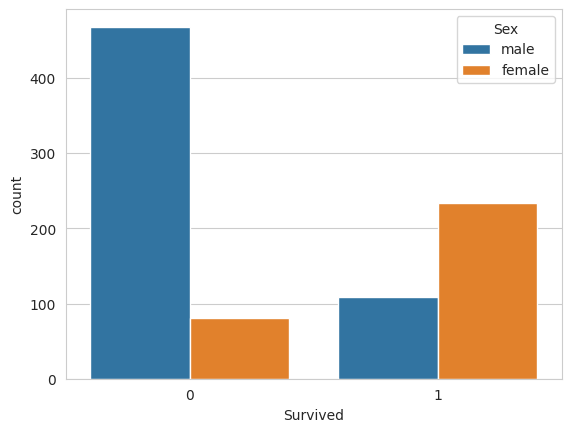

In [14]:
#Sobreviventes vs género
sns.countplot(x='Survived', hue='Sex', data=dados)

O número de não sobreviventes (0) de género masculino é mais de cinco vezes superior ao número de não sobreviventes de género feminino. Por outro lado, o número de sobreviventes (1) do género feminino é mais do dobro do número de sobreviventes masculino. Assim, o sexo é um atributo importante para considerar no modelo.

<Axes: xlabel='Survived', ylabel='count'>

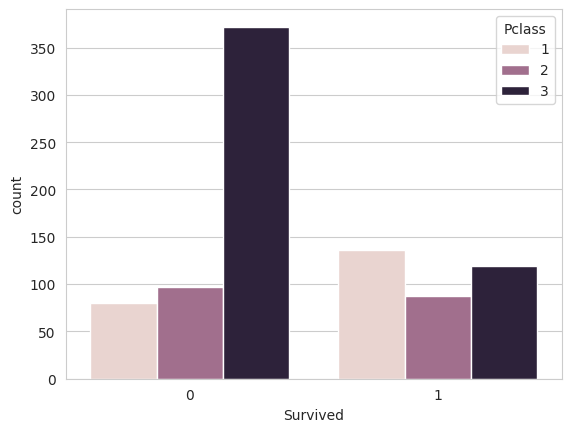

In [15]:
#Sobreviventes vs classe do bilhete
sns.countplot(x='Survived', hue='Pclass', data=dados)

O gráfico anterior mostra que o número de não sobreviventes viajou predominantemente da terceira classe. Por outro lado, o número de sobreviventes em primeira classe é superior ao número de sobreviventes em qualquer outra classe. Assim, incluiremos também este atributo no modelo.

Vejamos como se distribui o número de sobreviventes / não sobreviventes consoante o número de irmãos/esposos (*SibSp*)  e consoante o número de pais ou filhos a bordo (*Parch*).

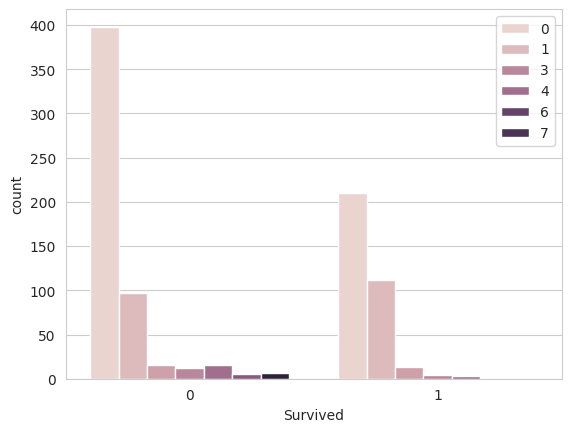

In [16]:
#Sobreviventes
sns.countplot(x='Survived', hue='SibSp', data=dados)
plt.legend(loc='upper right')

<Axes: xlabel='Survived', ylabel='count'>

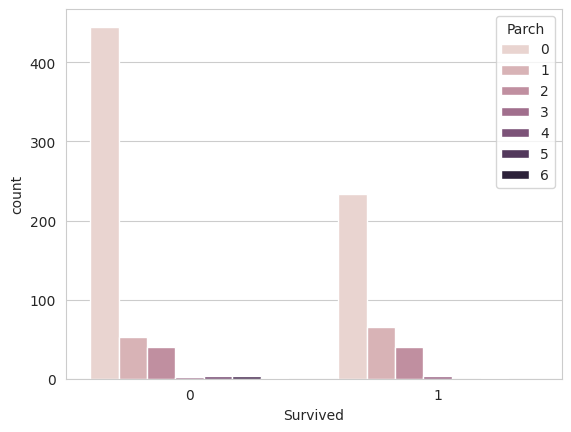

In [17]:
sns.countplot(x='Survived', hue='Parch', data=dados)

Talvez esta relação fique ainda mais clara se considerarmos um novo atributo que represente o número de familiares a bordo, e obtido a partir da soma dos valores de "*Parch*" com "*SibSp*". Denominemos este novo atributo como "*FamilySize*" e vejamos como se distribui de acordo com sobreviventes/não sobreviventes:

In [18]:
#Criar nova coluna de dados
dados["FamilySize"]=dados.Parch+dados.SibSp

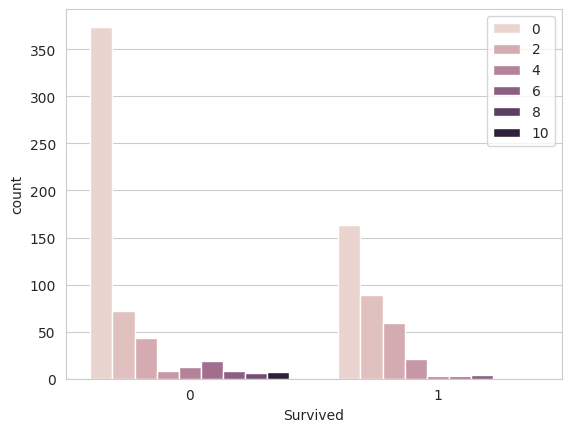

In [19]:
#Observar a distribuição de FamilySize
sns.countplot(x='Survived', hue='FamilySize', data=dados)
plt.legend(loc='upper right')

Estes gráficos mostram de forma clara que a maioria dos passageiros a bordo viajou sem familiares, e que a proporção de passageiros sem familiares a bordo face a  passageiros com familiares é muitissimo superior no caso dos não sobreviventes. Por outro lado, o número de sobreviventes com mais que 3 familiares a bordo é baixo, e, na sua maioria, fazem parte dos não sobreviventes.
Em resumo, o último gráfico indica que,  proporcionalmente,  passageiros com um pequeno número de familiares a bordo  tiveram maior probabilidade de se salvarem do que passageiros sem familiares ou com um grande número de familiares a bordo.  
Portanto, o número de familiares a bordo também é relevante para a construção do modelo, e pode substituir "Parch" e "SibSp"

Consideraremos também este novo atributo no treino do modelo, em substituição dos outros dois que lhe deram origem. Vamos aproveitar para retirar também a coluna "PassengerID", uma vez que não é relevante para o modelo.




In [20]:
dados_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [21]:
#retirar os atributos Parch, SibSp e PassengerID
dados.drop(["Parch","SibSp"], axis=1, inplace=True)

In [22]:
dados.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


<Axes: xlabel='Survived', ylabel='count'>

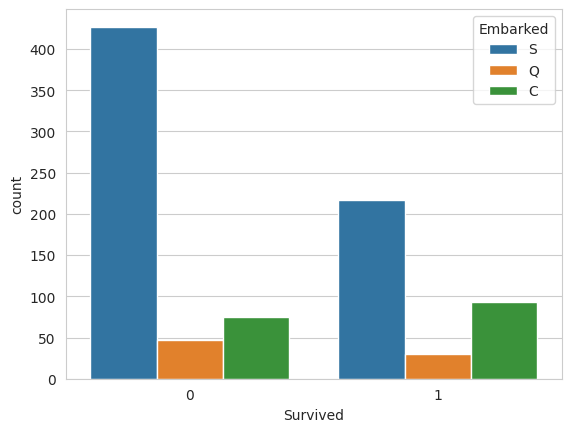

In [23]:
#Sobreviventes por porto de embarque
sns.countplot(x='Survived', hue='Embarked', data=dados)

A maioria dos passageiros embarcou de Southampton, seguido de Cherbourg e Queensland. Os passageiros embarcados em Cherbourg salvaram-se em maior proporção do que os embarcados nos outros dois portos.
Portanto, esta característica também parece ser relevante, pelo que a vamos também considerar no modelo.

In [24]:
dados.Fare.nunique()

248

Relativamente a `Fare`, vemos que os  valores são muito dispersos : 248 valores únicos. Assim, não é adequado criar um gráfico do género dos anteriores.   
Podemos no entanto tentar perceber se existe alguma relação entre Fare e a classe dos bilhetes.

<Axes: xlabel='Fare', ylabel='Pclass'>

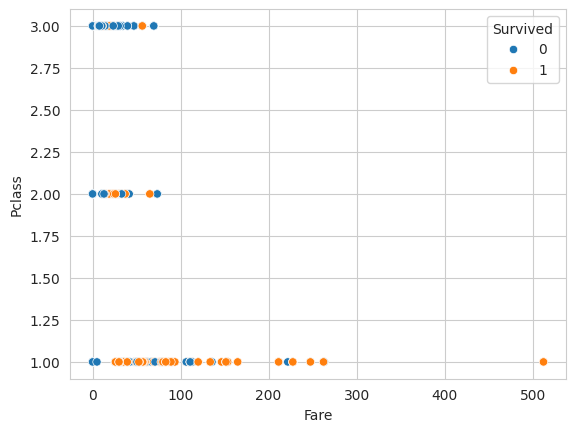

In [25]:
sns.scatterplot(x=dados.Fare, y=dados.Pclass, hue=dados.Survived)

Vemos que os valores mais baixos de Fare se distribuem por todas as classes, mas que os valores mais altos (a partir de um pouco menos de 100) são exclusivos da 1ª classe, como seria razoável esperar. Verificamos também que a percentagem dos que se salvam é muito superior para a 1ª classe. Como existem valores 0, suspeitamos que Fare não representa necesariamente o preço pago por um bilhete, mas sim o valor pago por um conjunto de bilhetes (que pode ser 0, 1, ou mais). Alguns passageiros terão pago 0, por exemplo, porque terá sido outro membro familiar a bordo a  pagar a sua passagem   (caso das crianças). Trata-se, no entanto, de uma suspeita, para a qual seria necessário mais trabalho exploratório para confirmação. Dada a incerteza relativa ao significado deste atributo, vamos deixá-lo de fora no treino do modelo.

# Lidar com valores omissos

Existem três abordagens possíveis para lidar com valores ausentes:

1.   **Ignorar** (não usar) as colunas com valores ausentes, ou ausentes
2.   **Imputação**. Trata-se de um método estatístico para o tratamento de valores ausentes, substituindo-se os mesmos pelas suas estimativas. Como estimativa utiliza-se a média, a mediana ou o valor mais frequente.
3.   **Extensão da imputação**: adicionam-se colunas identificando quais foram os dados aos quais foi aplicada a imputação.

A primeira abordagem só é adequada se a maioria dos dados da coluna em causa forem ausentes. Se houver poucos valores ausentes numa dada coluna e, mesmo assim, a coluna for ignorada,  o modelo perde acesso a muita informação que poderia ser útil.

A segunda abordagem é mais comum quando a percentagem de valores ausentes não é demasiado elevada, e conduz normalmente a bons resultados. O valor imputado não será o valor exato, mas normalmente conduz a melhores resultados do que simplesmente ignorar a coluna inteira.

A terceira abordagem pode ser usada quando a imputação simples não for suficiente.

Comecemos por recordar quais são os atributos com dados ausentes e calcular as respetivas percentagens:

In [26]:
dados.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
Ticket          0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
dtype: int64

In [27]:
#percentagem de dados omissos do atributo "Cabin"
omissos_cabin = dados.Cabin.isna().sum() / dados.Cabin.isna().count()*100
print("Dados omissos em Cabin: %.0f%%" %omissos_cabin)


Dados omissos em Cabin: 77%


Há cerca de 77% dos valores de "Cabin" em falta. Esta é uma percentagem demasiado grande para poder ser substituída por qualquer outro valor, por isso vamos simplesmente não incluir este atributo no treino do nosso modelo.

Excluímos a coluna respetiva nos dados de treino e nos dados de teste.

In [28]:
dados.drop(["Cabin"], axis=1, inplace=True)


In [29]:
dados.shape

(891, 9)

In [30]:
#percentagem de dados ausentes do atributo "Age"
ausentes_age = dados.Age.isna().sum() / dados.Age.count() * 100
print("Dados ausentes em Age: %.0f%%" %ausentes_age)

Dados ausentes em Age: 25%


Já relativamente a Age, apenas existem 25% de dados omissos, pelo que vale a pena usar a estratégia da imputação nesta coluna. Para já, vamos utilizar a imputação simples utilizando a média como estimativa. Posteriormente, iremos explorar as restantes estratégias disponíves.

### Imputação de dados -  Simple Imputer



Para substituição dos valores ausentes, vamos utilizar a classe `SimpleImputer`,  disponível na biblioteca `scikit-learn`. No construtor da classe há que definir a estratégia que vai ser usada para estimar o valor dos dados ausentes.
A estratégia possíveis são as seguintes:
* **média** - definida por omissão; usada apenas com dados numéricos;
* **mediana**  - usada apenas com dados numéricos;;
* **valor mais frequente** - usada tanto para dados numéricos como categóricos;
*  **valor constante**,  a definir pelo utilizador - usada tanto para dados numéricos como categóricos;


**IMPORTANTE:**  

Os objetos da classe SimpleImputer possuem um método  `fit_transform()` e um método ``transform()``.
* `fit_transform()`  - calcula e aplica o valor definido pela estratégia usada; 
* ``transform()`` -  aplica o valor calculado; usa-se num subconjunto de dados.

Neste exexmplo iremos apenas usar o  `fit_transform()` 


A informação mais completa sobre o SimpleImputer pode ser consultada em  https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html.



#### `SimpleImputer()` na prática

Em princípio, a estratégia a usar na imputação será diferente para os dados numéricos e para os dados categóricos.

Então, por conveniência, separam-se os subconjuntos de treino e teste apenas para as variáveis numéricas, e, posteriormente, paenas para as variáveis categóricas. Para isto, pode usar-se método `select_dtypes()`

In [31]:
dados_num=dados.select_dtypes(include='number')
dados_num.head()

,Survived,Pclass,Age,Fare,FamilySize
PassengerId,,,,,
1,0,3,22.0,7.2500,1
2,1,1,38.0,71.2833,1
3,1,3,26.0,7.9250,0
4,1,1,35.0,53.1000,1
5,0,3,35.0,8.0500,0


In [32]:
from sklearn.impute import SimpleImputer

#Criar o objecto my_imputer usando a média como estratégia
my_imputer = SimpleImputer(strategy='mean')

# calcular e aplicar a a média usando  fit_transform()
#fit_transform()  devolve um  array, que convertemos num DataFrame
dados_num_imp = pd.DataFrame(my_imputer.fit_transform(dados_num))



#O Imputer retira o nome das colunas, vamos colocá-las de volta:
dados_num_imp.columns = dados_num.columns
#O Imputer reformula o índice, vamos colocar o original:
dados_num_imp.index = dados_num.index

In [33]:
dados_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   Fare        891 non-null    float64
 4   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 41.8 KB


In [34]:
dados_num_imp.head()

,Survived,Pclass,Age,Fare,FamilySize
PassengerId,,,,,
1,0.0,3.0,22.0,7.2500,1.0
2,1.0,1.0,38.0,71.2833,1.0
3,1.0,3.0,26.0,7.9250,0.0
4,1.0,1.0,35.0,53.1000,1.0
5,0.0,3.0,35.0,8.0500,0.0


Comfirmemos que já não existem valores numéricos omissos:  

In [35]:
print(dados_num_imp.isna().sum())


Survived      0
Pclass        0
Age           0
Fare          0
FamilySize    0
dtype: int64


Resta o atributo `Embarked`, não numérico, que possui 2 valores omissos.  
Comecemos então por criar o subconjunto de variáveis categóricas.

In [36]:
dados.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
dados_cat = dados.select_dtypes(include ='object')
dados_cat.head()

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S


In [38]:
print(dados_cat.isna().sum())

Name        0
Sex         0
Ticket      0
Embarked    2
dtype: int64


Podemos usar o `SimpleImputer`, mas, como não se tratam de valores numéricos, não podemos usar a média ou mediana como estratégia. Aqui faz algum sentido usar o valor mais frequente dos três posíveis (S,C,Q).


In [39]:
my_imputer = SimpleImputer(strategy='most_frequent')

#usar o imputer separadamente no treino e teste.
#converter em DataFrame, já com o nome das colunas
dados_cat_imputed = pd.DataFrame(my_imputer.fit_transform(dados_cat),
                                  columns =dados_cat.columns, index=dados_cat.index )

dados_cat_imputed.head()

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S


Verificar que já não existem valores omissos entre as colunas de dados categóricos:

In [40]:
print(dados_cat_imputed.isna().sum())

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64


Verificar como foram distribuídos os valores imputados:

In [41]:
print("Dados - before imputation")
print(dados_cat["Embarked"].value_counts())
print("\nDados - after imputation")
print(dados_cat_imputed["Embarked"].value_counts())


Dados - before imputation
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Dados - after imputation
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


Antes de se iniciar o  treino do modelo, há ainda que transformar as variáveis categóricas, uma vez que para a regressão logística, como para muitos outros algoritmos de aprendizagem máquina, os dados apenas podem conter variáveis numéricas.

# Transformar variáveis categóricas

Muitos dos algoritmos de aprendizagem máquina funcionam apenas com variáveis do tipo numérico. Assim, é necessário, antes de treinar o modelo, decidir como lidar com  as **variáveis categóricas**.

Há duas abordagens possíveis:
1. Não utilizar  colunas não numéricas. Evidentemente, esta abordagem tem que ser equacionada com cautela, porque se poderá estar a desprezar informação valiosa.  
2.  Transformar as variáveis categóricas em informação numérica, ou seja, **codificar** as variáveis categóricas.


A biblioteca *scikit learn* disponibiliza 2 tipo de **codificadores** (*encoders*) para codificar numericamente variáveis categóricas:

1.  **Label Encoder** : Acrescenta uma coluna ao dados, atribuindo um valor numérico inteiro a cada um dos valores únicos do atributo em questão. Por exemplo, se o atributo for "país" e o valores forem "Portugal", Espanha" e "França", o LabelEncoder acrescentaria uma nova coluna, preenchida com 0 para o caso de "Portugal", 1 para o caso de "Espanha" e 2 para o caso de "França".
A desvantagem desta abordagem é que, posteriormente, o algoritmo de aprendizagem máquina pode considerar que existe alguma ordem no valor do atributo (por exemplo, 0 ser mais importante que 1, mais importante que 2, ou o inverso), o que pode não corresponder à realidade.
2.    **OneHotEncoder** (*One Out of N Encoder*): utilizado quando  se quer  garantir que não há interpretação relativa à ordem do valor codificado. O OneHotEncoder acrescenta aos dados tantas colunas quanto a cardinalidade (o número de valores possíveis) da variável a codificar, atribuindo o valor 1 à coluna que representa o valor em causa, e 0 às restantes.
No exemplo do atributo "país" usado em cima, os dados codificados pelo OneHotEncoder teriam três coluna extra; quando o valor fosse "Portugal", a primeira coluna teria 1 e as restantes 0; se fosse "Espanha", a 2ª coluna teria 1 e as restantes 0, e por aí fora.
A desvantagem do OneHotEncoder é que, se a **cardinalidade** for elevada e/ou o número de variáveis categóricas for elevado, o resultado pode ser um conjunto de dados com um número muito elevado de novas colunas. Por isso, o OneHotEncoder é usado sobretudo para variáveis de baixa cardinalidade.




Voltemos então ao nosso subconjunto de dados não numéricos, e analisemos a adequabilidade  das opções disponíveis

As colunas `Sex` e `Embarked` podem ser facilmente codificadas em variáveis numéricas, porque a sua cardinalidade é baixa (2 e 3, respetivamente). No entanto, o mesmo não se pode dizer de `Name` ou `Ticket`, tendo em conta o número elevado de valores únicos de cada um desses atributos, ou seja, a sua elevada **cardinalidade**.

In [42]:
dados_cat_imputed.Name.nunique()

891

In [63]:
dados_cat_imputed.Ticket.nunique()

AttributeError: 'DataFrame' object has no attribute 'Ticket'

Assim, vamos optar por não usar estes atributos. retirando-os do conjunto de dados

Embora essa exploração esteja fora do âmbito deste tutorial, repare-se que ambos os atributos poderiam ser utilizados para optimizar a  exploração de dados e fazer alguma *engenharia de atributos*. De facto,  o prefixo no nome (Mrs, Miss, Mrs, etc) poderia ser utilizado para tentar uma melhor estimativa das idades omissas; o bilhete poderia servir para agrupar passageiros a viajar juntos (repare-se que existem apenas 569 valores diferentes para os 712 passageiros no subconjunto de treino).  

Uma outra nota relativamente a `Name`. Tendo em conta a legislação de **proteção de dados** e as atuais **preocupações éticas**, é  impensável  atualmente, sobretudo na Europa,  que um conjunto de dados para predição possua informação que permita identificar pessoas, nomeadamente o nome. Qualquer dataset terá que ser anonimizado antes de ser disponibilizado para treino de modelos de aprendizagem máquina.


In [64]:
#retirar os atributos Name e Ticket
dados_cat_imputed.drop(["Name","Ticket"], axis=1, inplace=True)

KeyError: "['Name', 'Ticket'] not found in axis"

Restam-nos agora apenas os atributos `Sex` e `Embarked`, para os quais vamos usar o OneHotEncoder.

In [59]:
#dados_cat_imputed.head()
dados_cat_imputed['Embarked'].values[0] = "D"

Começamos por criar o objeto da classe **OneHotEncoder**, usamos o *fit_transform()* nos dados de treino, para determinar os parâmetros, e depois o *transform()* nos dados de teste.

A documentação sobre o OneHotEncoder pode ser encontrada em https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False, drop='first')

No construtor, usou-se `first` como parâmetro para `drop`, porque, embora o OneHotEncoder crie N colunas para cada variável (sendo N a cardinalidade da variável), os valores ficam perfeitamente definidos com apenas N-1 colunas.

Por exemplo, `Sex`, que tem cardinalidade 2, fica completamente definido apenas com uma coluna, em que um género é definido por 1, o outro género definido por 0.

O mesmo é válido para atributos de maior cardinalidade.

Usou-se `sparse_output=False` para obtenção de uma `np.array` e não uma matriz esparsa, que implicaria maior complexidade para ser transformada num `DataFrame`

Em seguida, usa-se o *fit_transform()*:

In [66]:
#nome das colunas que vão ser adicionadas
colunas=["Sex", "Embarked_2", "Embarked_1","Embarked_0"]
dados_cat_ohe=pd.DataFrame (ohe.fit_transform(dados_cat_imputed),
                             columns = colunas, index = dados_cat_imputed.index)


In [67]:
dados_cat_ohe.head(8)


,Sex,Embarked_2,Embarked_1,Embarked_0
PassengerId,,,,
1,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,1.0
6,1.0,0.0,1.0,0.0
7,1.0,0.0,0.0,1.0
8,1.0,0.0,0.0,1.0


In [ ]:
dados_cat_imputed.head(8)

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S
6,male,Q
7,male,S
8,male,S


Comparando Xtrain antes e depois da aplicação do OneHotEncoder, verifica-se:
* relativamente a *Sex*:  `female` foi codificado com `1`, `male` com `0`.
* relativamente a *Embarked*: `C` foi codificado com `00`; `S` foi codificado com `01`, e `Q` foi codificado com `10`.

Por fim, resta juntar as colunas de dados numéricos às colunas de dados categóricos para obter o conjunto de dados com os quais  posteriormente   se treinará e testará o modelo.

Podemos fazer isto usando o  método `join()` .

In [ ]:
dados_final = dados_num_imp.join(dados_cat_ohe)


In [ ]:
print(dados_final.shape)
dados_final.head()

(891, 8)


,Survived,Pclass,Age,Fare,FamilySize,Sex,Embarked_1,Embarked_0
PassengerId,,,,,,,,
1,0.0,3.0,22.0,7.2500,1.0,1.0,0.0,1.0
2,1.0,1.0,38.0,71.2833,1.0,0.0,0.0,0.0
3,1.0,3.0,26.0,7.9250,0.0,0.0,0.0,1.0
4,1.0,1.0,35.0,53.1000,1.0,0.0,0.0,1.0
5,0.0,3.0,35.0,8.0500,0.0,1.0,0.0,1.0


In [ ]:
#gravar dados para usar  noutros notebooks
dados_final.to_csv("titanic_preprocessado.csv", sep=',', index=False)